# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import signal
import soundfile as sf
import time

In [32]:
def dftf(x, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))


In [33]:
N = 12
n_0 = 3

x = np.ones(N)
k = np.arange(x.size)

y = np.cos(2 * np.pi * k * n_0 / N)

print('x = ', x)
print('y = ', y)
print('k = ', k)

nu, X = dftf(x, M=1024)
nu, Y = dftf(y, M=1024)

x =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y =  [ 1.00000000e+00  6.12323400e-17 -1.00000000e+00 -1.83697020e-16
  1.00000000e+00  1.19434012e-15 -1.00000000e+00 -4.28626380e-16
  1.00000000e+00  5.51091060e-16 -1.00000000e+00 -2.44991258e-15]
k =  [ 0  1  2  3  4  5  6  7  8  9 10 11]


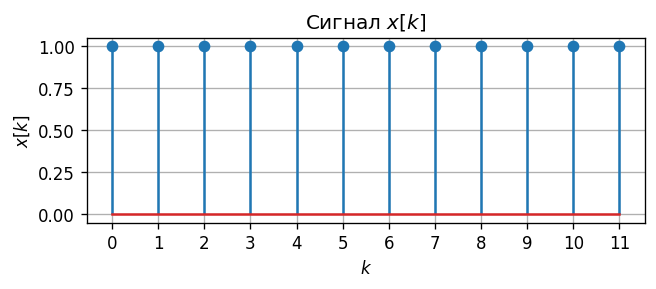

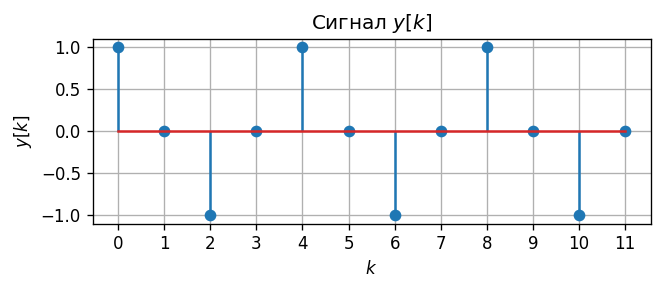

In [34]:
figure1 = plt.figure(figsize=[6, 2], dpi=120)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(k, x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.show()

figure2 = plt.figure(figsize=[6, 2], dpi=120)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(k, y)
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.title("Сигнал $y[k]$")
plt.grid()
plt.show()

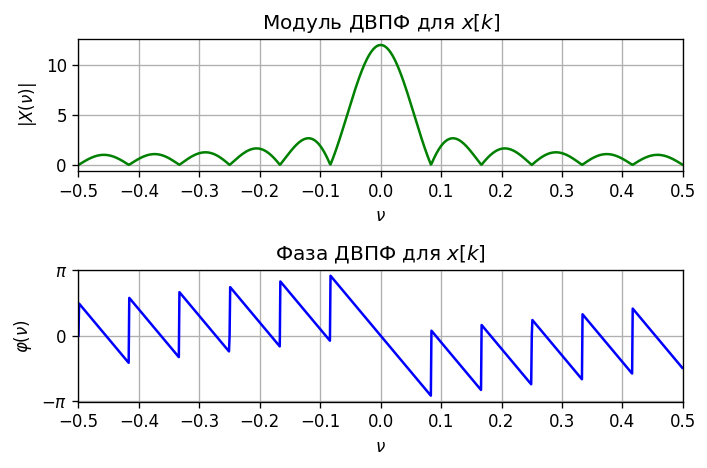

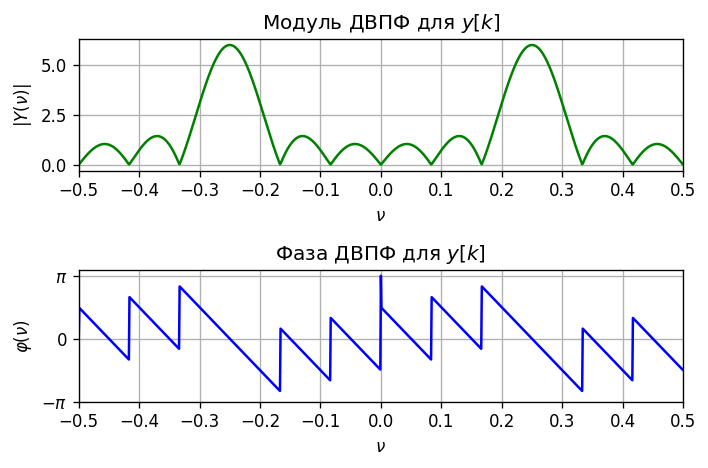

In [35]:

plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.angle(X), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title("Фаза ДВПФ для $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=[6, 4], dpi=120)
ax3 = plt.subplot(2, 1, 1)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(Y), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $y[k]$")
plt.grid()
ax4 = plt.subplot(2, 1, 2)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.angle(Y), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title("Фаза ДВПФ для $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
# Аналитические формулы
def dftf_ones(nu) -> np.array:
    np.delete(nu, np.where(abs(nu) < 0.1))
    return (np.sin(N * np.pi * nu) / np.sin(np.pi * nu)) * np.exp(-1j * (N - 1) * np.pi * nu)
X = dftf_ones(nu)
Y = 0.5 * dftf_ones(nu - n_0 / N) + 0.5 * dftf_ones(nu + n_0 / N)

/tmp/ipykernel_12576/2570813059.py:4: RuntimeWarning: invalid value encountered in divide
  return (np.sin(N * np.pi * nu) / np.sin(np.pi * nu)) * np.exp(-1j * (N - 1) * np.pi * nu)


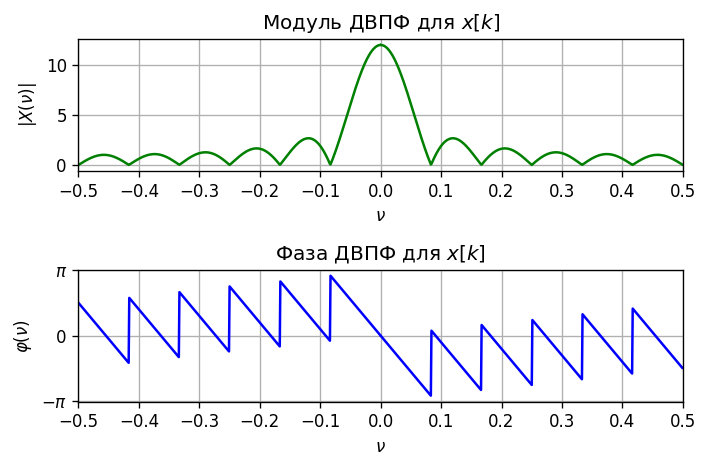

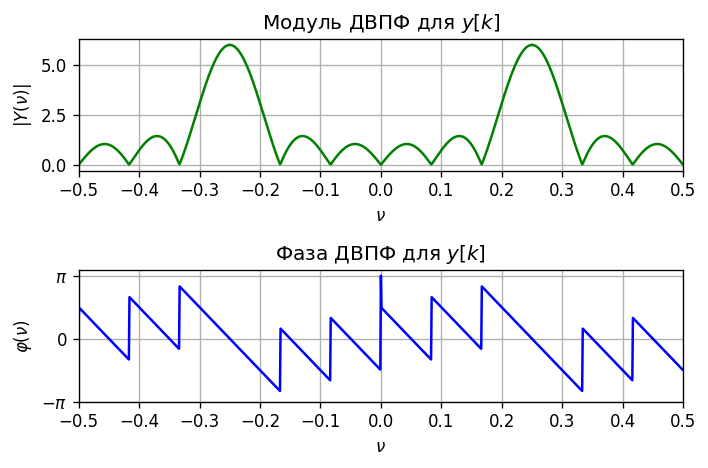

In [37]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.angle(X), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title("Фаза ДВПФ для $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=[6, 4], dpi=120)
ax3 = plt.subplot(2, 1, 1)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(Y), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $y[k]$")
plt.grid()
ax4 = plt.subplot(2, 1, 2)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.angle(Y), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title("Фаза ДВПФ для $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

Графики, построенные по аналитическим формулам, точно совпадают с графиками, построенными согласно дискретному во времени преобразованию Фурье.

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

Возьмем для примера отсчеты косинуса из предыдущего задания

In [38]:
N = 12

x = np.ones(N)
k = np.arange(x.size)
y = np.cos(2 * np.pi * k * 1 / N) # n_0 = 1

Y = dftf(y, M=1024)

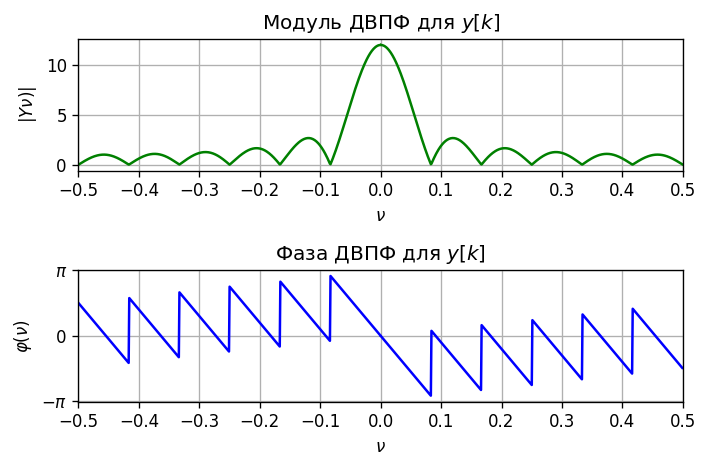

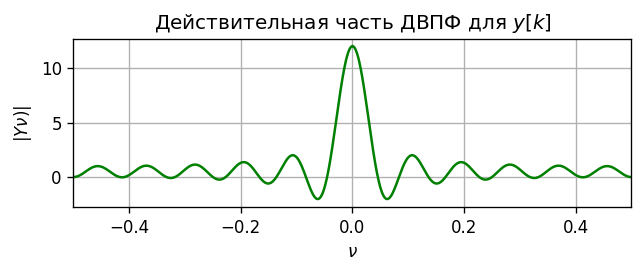

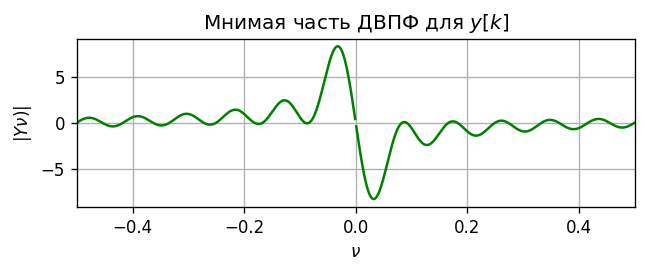

In [39]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $y[k]$")
plt.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.angle(X), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title("Фаза ДВПФ для $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=[6, 4], dpi=120)
ax3 = plt.subplot(2, 1, 1)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, X.real, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Действительная часть ДВПФ для $y[k]$")
plt.grid()

plt.figure(figsize=[6, 4], dpi=120)
ax3 = plt.subplot(2, 1, 1)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, X.imag, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Мнимая часть ДВПФ для $y[k]$")
plt.grid()


# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |

 Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

[4.1 3.5 1.2 5.  2.  3.3]


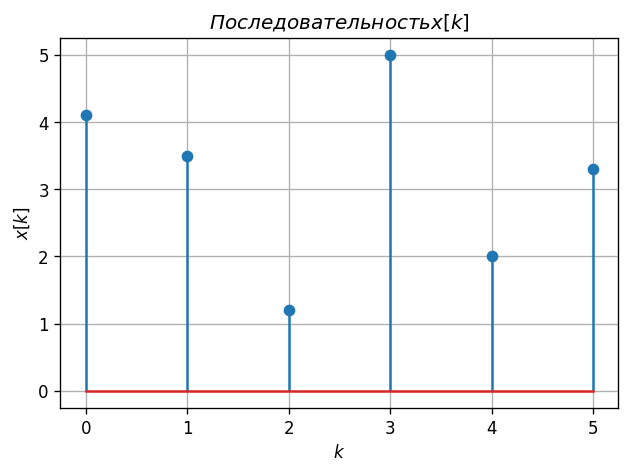

In [40]:
# Вариант 1
n_0 = -3
l = 6
x = np.array([4.1, 3.5, 1.2, 5.0, 2.0, 3.3])
k = np.arange(x.size)
print(x)

plt.figure(figsize=[6, 4], dpi=120)
plt.stem(k, x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("$Последовательность x[k]$")
plt.grid()


[19.1+0.00000000e+00j  0.9+5.19615242e-01j  4.1-8.66025404e-01j
 -4.5-5.55111512e-17j  4.1+8.66025404e-01j  0.9-5.19615242e-01j]


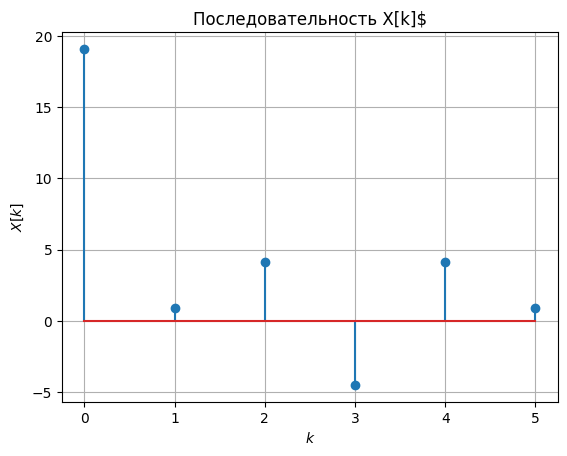

In [41]:
X = np.fft.fft(x)
print(X)

plt.stem(k, X)
plt.xlabel(r"$k$")
plt.ylabel(r"$X[k]$")
plt.title(r"Последовательность X[k]$")
plt.grid()

[-4.5-5.55111512e-17j  4.1+8.66025404e-01j  0.9-5.19615242e-01j
 19.1+0.00000000e+00j  0.9+5.19615242e-01j  4.1-8.66025404e-01j]


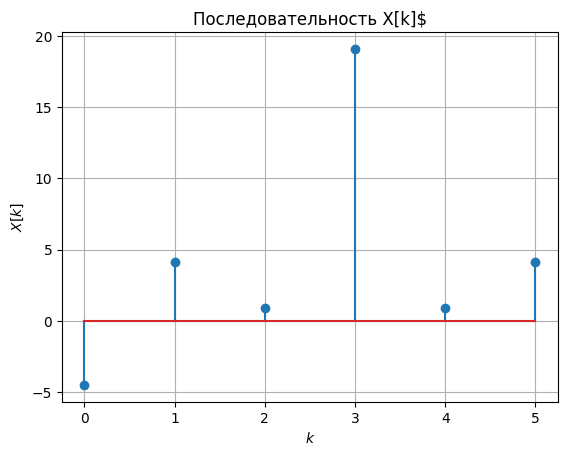

In [42]:
X = np.roll(X, n_0)
print(X)

plt.stem(k, X)
plt.xlabel(r"$k$")
plt.ylabel(r"$X[k]$")
plt.title(r"Последовательность X[k]$")
plt.grid()

[ 4.1-9.25185854e-18j -3.5+6.47630098e-17j  1.2-1.37449371e-16j
 -5. -1.42099146e-17j  2. +1.18945654e-16j -3.3-7.83086708e-17j]


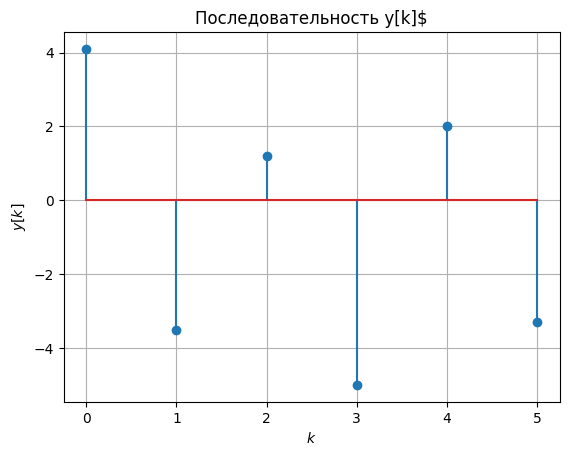

In [43]:
y = np.fft.ifft(X)
print(y)

plt.stem(k, y)
plt.xlabel(r"$k$")
plt.ylabel(r"$y[k]$")
plt.title(r"Последовательность y[k]$")
plt.grid()

## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


### Вариант 1
Для действительной последовательности по свойству симметрии имеем:

X[11] = X[1]* = -7 + 5j

X[10] = X[2]* = 1 + 8j

X[9] = X[3]* = 4 - 3j

X[8] = X[4]* = 2 + 6j

X[7] = X[5]* = 4 + 4j

[12.+0.j -7.-5.j  1.-8.j  4.+3.j  2.-6.j  4.-4.j  0.+0.j  4.+4.j  2.+6.j
  4.-3.j  1.+8.j -7.+5.j]


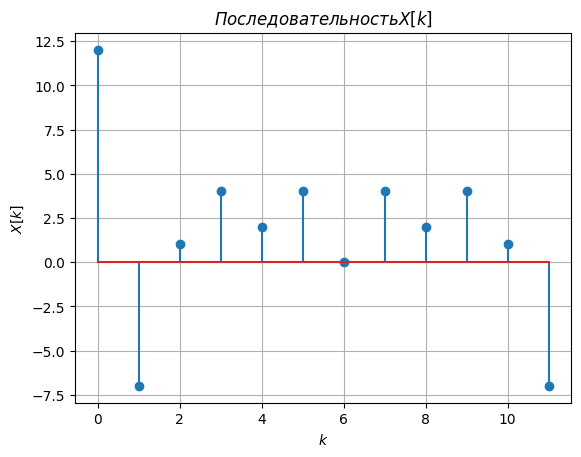

In [44]:
N = 12
X = np.array([12, -7 -5j, 1 - 8j, 4 + 3j, 2 - 6j, 4 - 4j, 0, 4 + 4j, 2 + 6j, 4 - 3j, 1 + 8j, -7 + 5j])
print(X)
k = np.arange(X.size)

plt.stem(k, X)
plt.xlabel(r"$k$")
plt.ylabel(r"$X[k]$")
plt.title(r"$Последовательность X[k]$")
plt.grid()

In [45]:
mean_sq = 1 / N

[ 1.66666667+0.j  1.59967937+0.j  0.26634604+0.j  3.16666667+0.j
  1.5223291 +0.j  0.73365396+0.j  1.33333333+0.j  4.27510585+0.j
  1.81100423+0.j -0.83333333+0.j -0.59967937+0.j -2.94177252+0.j]


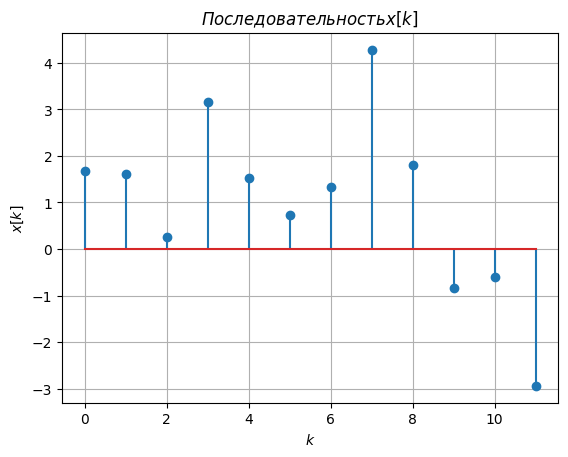

In [46]:
x = np.fft.ifft(X)
print(x)
k = np.arange(x.size)

plt.stem(k, x)
plt.xlabel(r"$k$")
plt.ylabel(r"$x[k]$")
plt.title(r"$Последовательность x[k]$")
plt.grid()

In [47]:
print(np.mean(x))
print(np.sum(abs(x) ** 2))
print(np.sum(abs(x) ** 2 / N))

(1+0j)
51.33333333333332
4.277777777777777


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

[ 1.         0.5       -1.8660254  1.         0.1339746  0.5
 -1.        -0.5        1.8660254 -1.        -0.1339746 -0.5      ]


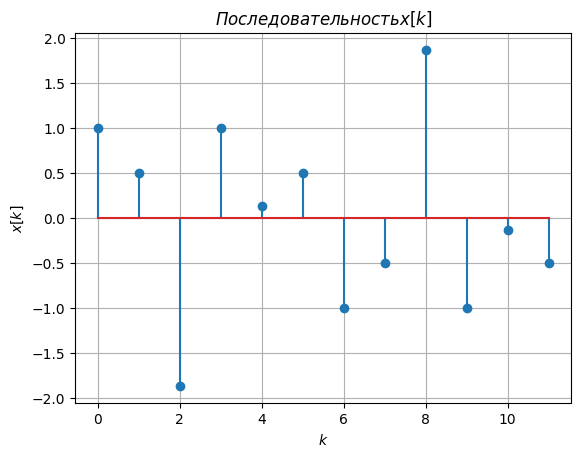

In [48]:
# Вариант 1
N = 12
r_1 = 3
r_2 = 5

k = np.arange(N)
x = np.cos(2 * np.pi / N * r_1 * k) + np.sin(2 * np.pi / N * r_2 * k)
print(x)

plt.stem(k, x)
plt.xlabel(r"$k$")
plt.ylabel(r"$x[k]$")
plt.title(r"$Последовательность x[k]$")
plt.grid()


[ 1.77635684e-15+0.00000000e+00j  1.32167562e-15-6.66133815e-16j
  1.99840144e-15+1.77635684e-15j  6.00000000e+00-2.46581906e-16j
  4.44089210e-16+3.33066907e-15j -4.41538106e-16-6.00000000e+00j
  4.44089210e-15+2.41968341e-15j -1.56355117e-14+6.00000000e+00j
  8.43769499e-15-8.65973959e-15j  6.00000000e+00+7.45996258e-15j
 -7.99360578e-15-3.55271368e-15j  2.53124718e-15-5.32907052e-15j]


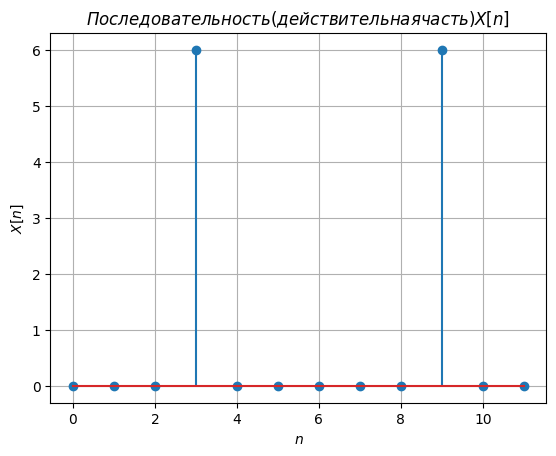

In [49]:
# Через формулы вычисления ДПФ
n = np.arange(N)
X = np.zeros(N, dtype=complex)
for idx in range(N):
    X[idx] = np.sum(x * np.exp(-1j * 2 * np.pi / N * k * idx))
print(X)

plt.stem(k, X.real)
plt.xlabel(r"$n$")
plt.ylabel(r"$X[n]$")
plt.title(r"$Последовательность (действительная часть) X[n]$")
plt.grid()


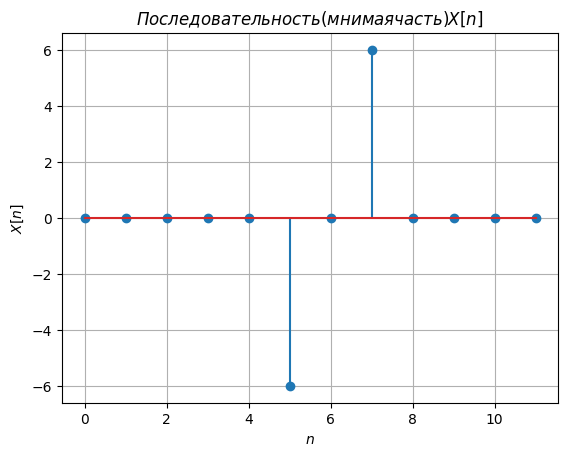

In [50]:
plt.stem(k, X.imag)
plt.xlabel(r"$n$")
plt.ylabel(r"$X[n]$")
plt.title(r"$Последовательность (мнимая часть) X[n]$")
plt.grid()

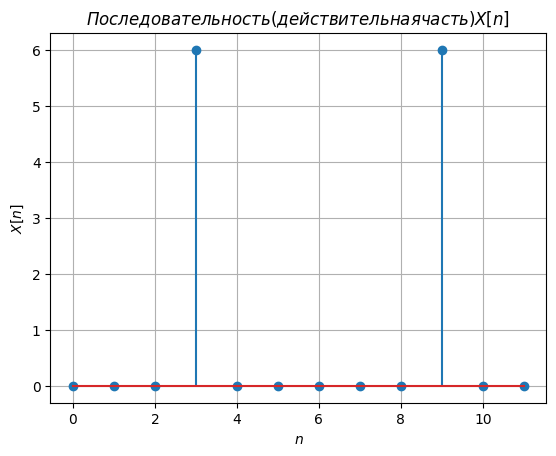

In [51]:
# Через np.fft
X = np.fft.fft(x)
plt.stem(k, X.real)
plt.xlabel(r"$n$")
plt.ylabel(r"$X[n]$")
plt.title(r"$Последовательность (действительная часть) X[n]$")
plt.grid()

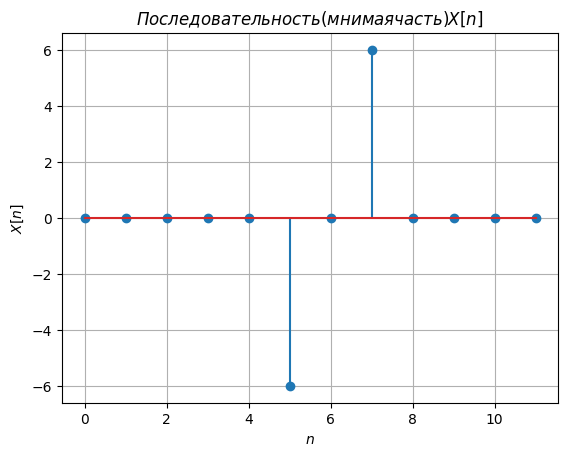

In [52]:
plt.stem(k, X.imag)
plt.xlabel(r"$n$")
plt.ylabel(r"$X[n]$")
plt.title(r"$Последовательность (мнимая часть) X[n]$")
plt.grid()

## Разложение по базисным коэффицентам

$\cos \left(\dfrac{ 2 \pi}{12} 3 k \right) = \dfrac{1}{2} \exp\left(j\dfrac{ 2 \pi }{12} 3 k\right) + \dfrac{1}{2} \exp\left(j\dfrac{ 2 \pi}{12} 9 k \right)$

$\sin \left(\dfrac{ 2 \pi}{12} 5 k\right) = -\dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi }{12} 5 k\right) + \dfrac{j}{2} \exp\left(j\dfrac{ 2 \pi}{12} 7 k \right)$

Получаем, что $\tilde{X}[3]=0.5$, $\tilde{X}[9]=0.5$, $\tilde{X}[5]=-0.5j$, $\tilde{X}[7]=+0.5j$ а остальные значения на периоде $[0, \;11]$ нулевые.

| X[0] | X[1] | X[2] |  X[3] | X[4] | X[5] | X[6] | X[7] | X[8] | X[9] | X[10] | X[11] |
|:----:|:----:|:----:|:-----:|:----:|:----:|:----:|:----:|:----:|:----:|:-----:|:-----:|
|   0  |   0  |   0  | 0.5   |   0  | -0.5j|   0  | 0.5j |   0  | 0.5  |   0   |   0   |



# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



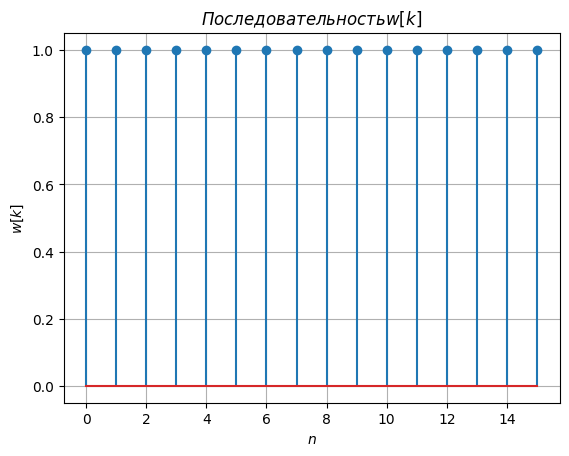

In [53]:
# Вариант 1
N = 16
k = np.arange(N)
w = np.ones(N)

plt.stem(k, w)
plt.xlabel(r"$n$")
plt.ylabel(r"$w[k]$")
plt.title(r"$Последовательность w[k]$")
plt.grid()


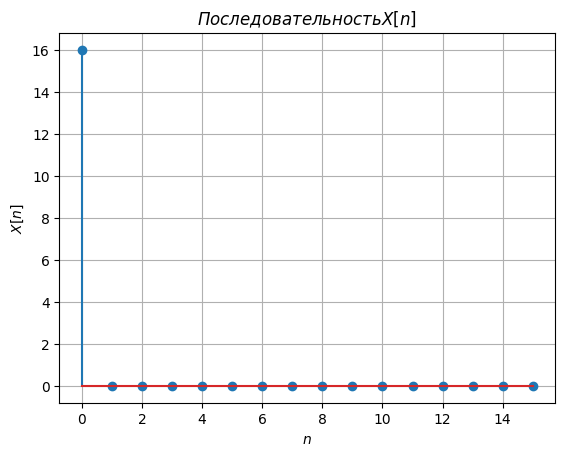

In [54]:
W = np.fft.fft(w)

plt.stem(k, W)
plt.xlabel(r"$n$")
plt.ylabel(r"$X[n]$")
plt.title(r"$Последовательность X[n]$")
plt.grid()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


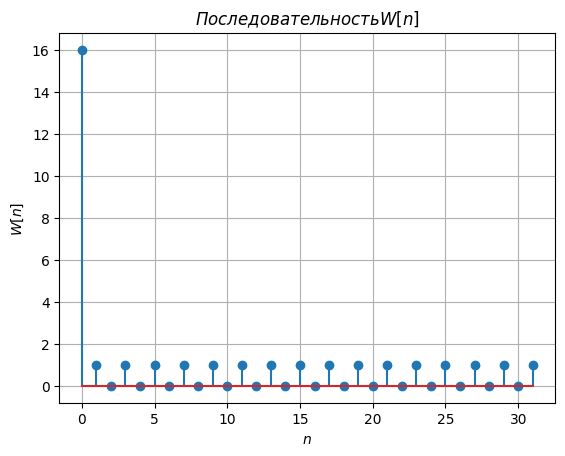

In [55]:
w_ext = np.zeros(N)
w_new = np.concatenate((w, w_ext))
print(w_new)

W = np.fft.fft(w_new)
k = np.arange(w_new.size)

plt.stem(k, W)
plt.xlabel(r"$n$")
plt.ylabel(r"$W[n]$")
plt.title(r"$Последовательность W[n]$")
plt.grid()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


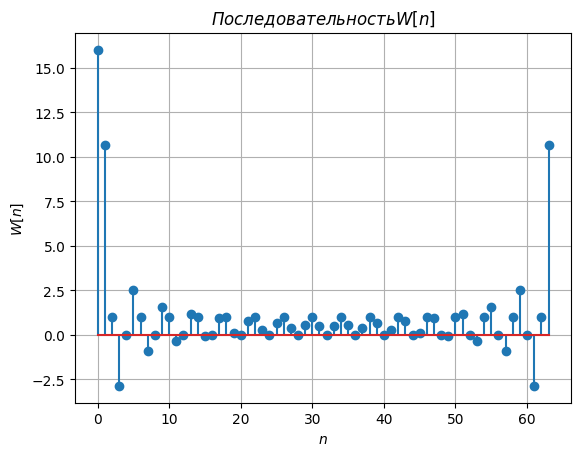

In [56]:
w_ext = np.zeros(3 * N)
w_new = np.concatenate((w, w_ext))
print(w)

W = np.fft.fft(w_new)
k = np.arange(w_new.size)

plt.stem(k, W)
plt.xlabel(r"$n$")
plt.ylabel(r"$W[n]$")
plt.title(r"$Последовательность W[n]$")
plt.grid()

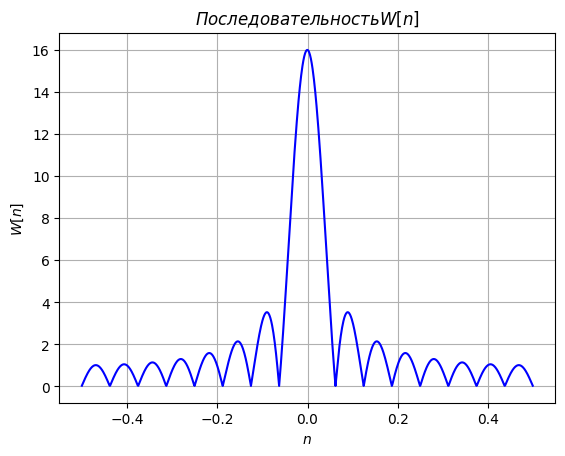

In [57]:
nu, W = dftf(w, M=1025)

plt.plot(nu, np.abs(W), 'b')
plt.xlabel(r"$n$")
plt.ylabel(r"$W[n]$")
plt.title(r"$Последовательность W[n]$")
plt.grid()

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

/tmp/ipykernel_12576/1127317798.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)
/tmp/ipykernel_12576/1127317798.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ml, sl, bl = plt.stem(np.arange(X.size), np.real(X), 'r', basefmt = 'k--', markerfmt = 'r' + 'o', use_line_collection=True)
/tmp/ipykernel_12576/1127317798.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ml, sl, bl = plt.stem(np.arange(X.size), np.imag(X), 'b

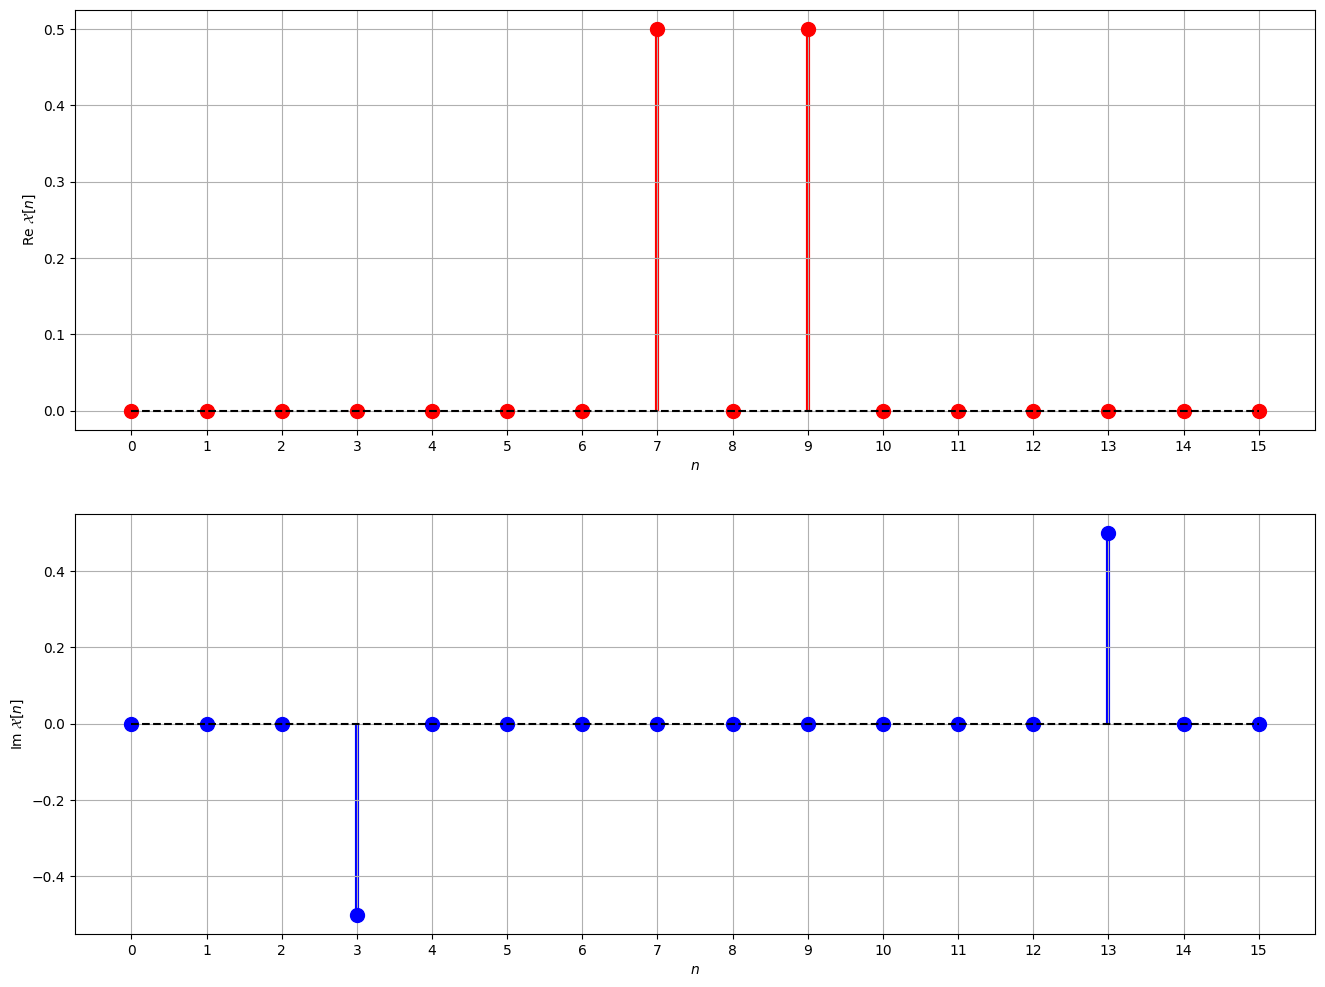

In [58]:
N = 16
r1 = 3
r2 = 7
k = np.arange(N)
x = np.sin(2*np.pi*k*r1/N) + np.cos(2*np.pi*k*r2/N)
X = np.fft.fft(x)/N

fig, ax = plt.subplots(figsize=(16, 12))
plt.subplot(211)
ml, sl, bl = plt.stem(np.arange(X.size), np.real(X), 'r', basefmt = 'k--', markerfmt = 'r' + 'o', use_line_collection=True)
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xticks(np.arange(X.size))
plt.xlabel('$n$')
plt.ylabel('Re $\mathcal{X}[n]$')
plt.grid()

plt.subplot(212)
ml, sl, bl = plt.stem(np.arange(X.size), np.imag(X), 'b', basefmt = 'k--', markerfmt = 'b' + 'o', use_line_collection=True)
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.ylabel('Im $\mathcal{X}[n]$')
plt.xticks(np.arange(X.size))
plt.xlabel('$n$')
plt.grid()

plt.show()


## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

/tmp/ipykernel_12576/11218891.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


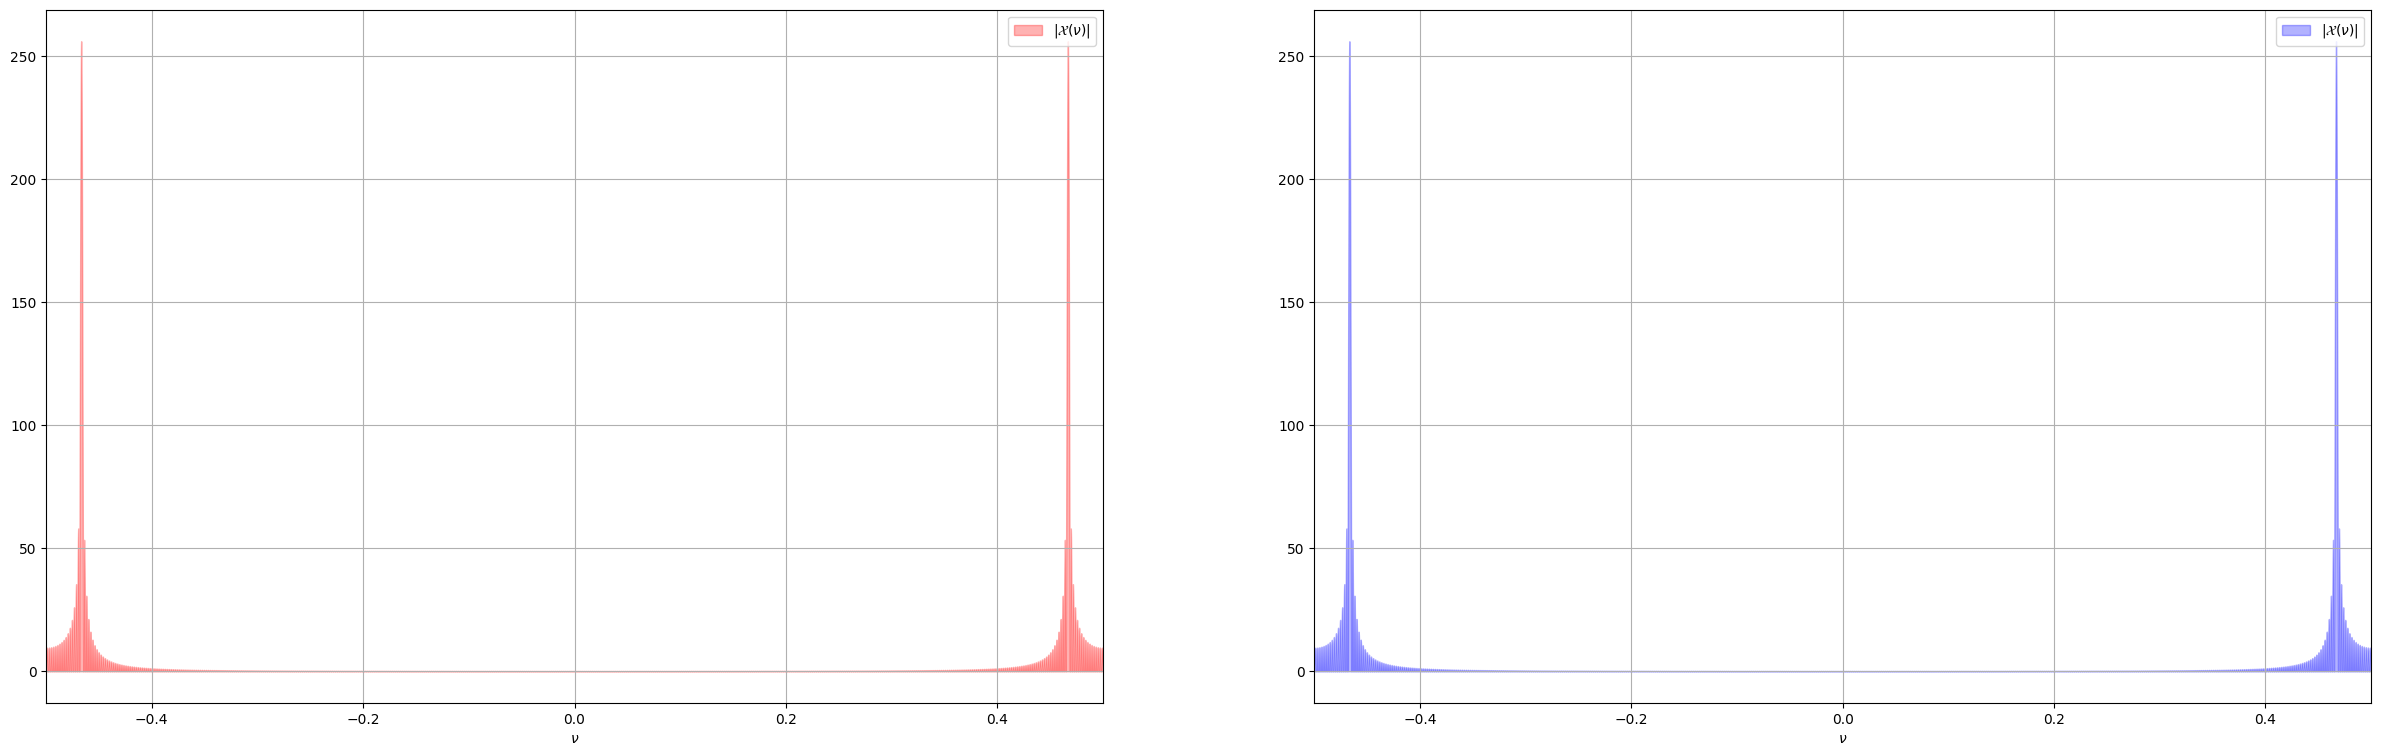

custom vs fft [s]:  1.4273803234100342  vs  0.0011107921600341797
L_inf diff: 7.997871053737425e-12 
L2 diff:  1.390841932548237e-10 
L2 diff per tick:  4.24451273360668e-15


In [64]:
N = 512
P = 32768
n_0 = np.random.randint(1, N//2)

x = np.sin(2*np.pi*n_0/N*np.arange(N))

@np.vectorize
def custom_DTFT(tick):
    return x @ np.exp(-1j*np.arange(N) * 2 * np.pi * tick) 
    
nu = np.arange(P)/P - 0.5

startpoint = time.time()
X = custom_DTFT(nu)
midpoint = time.time()
X_fft = np.fft.fftshift(np.fft.fft(x, P))
endpoint = time.time()


fig, ax = plt.subplots(figsize=(30, 9))
plt.subplot(121)
plt.fill_between(nu, abs(X), color = 'red', alpha = 0.3, label = '$|\mathcal{X}(\\nu)|$')
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('$\\nu$')
plt.grid()

plt.subplot(122)
plt.fill_between(nu, abs(X_fft), color = 'blue', alpha = 0.3, label = '$|\mathcal{X}(\\nu)|$')
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('$\\nu$')
plt.grid()

plt.show()

delta = np.linalg.norm(X - X_fft)
delta_abs = max(abs(X - X_fft))
print('custom vs fft [s]: ', midpoint - startpoint, ' vs ', endpoint - midpoint)
print('L_inf diff:', delta_abs, '\nL2 diff: ', delta, '\nL2 diff per tick: ', delta/P)

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

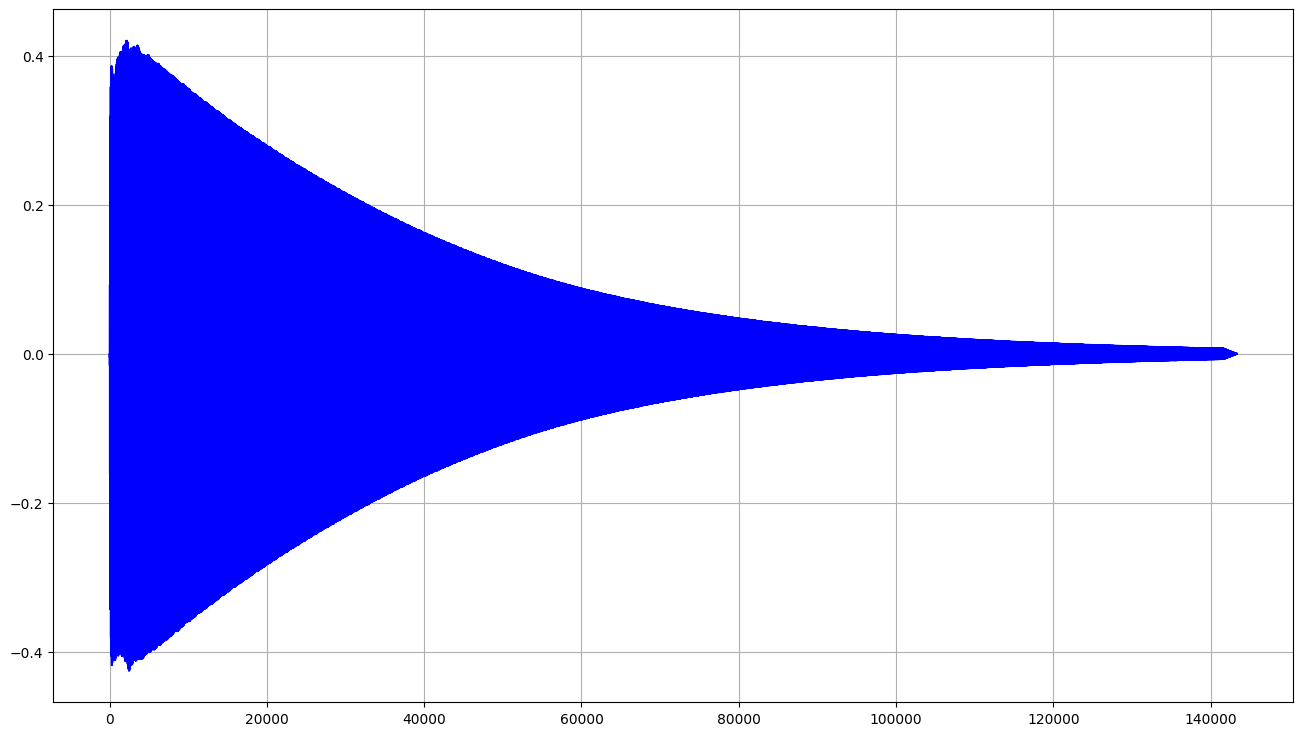

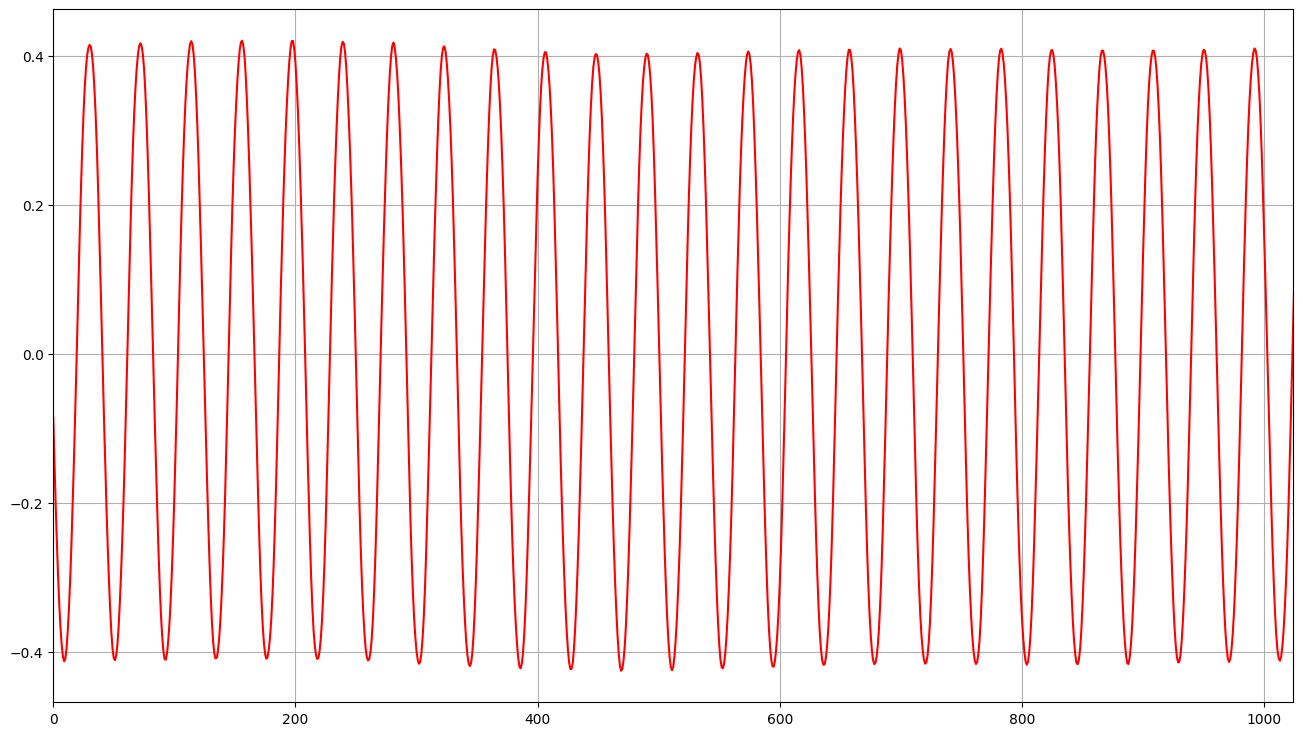

In [65]:
M = 2**13
x, fs = sf.read('./wav_files/vibraphone.wav')
fig, ax = plt.subplots(figsize=(16, 9)) 
plt.plot(x, 'blue')
plt.grid()
plt.show()

shift = 2000
fig, ax = plt.subplots(figsize=(16, 9)) 
plt.plot(x[shift:shift+M], 'red')
plt.xlim(0, 2**10)
plt.grid()
plt.show()

x = x[shift:shift+M]

In [66]:
print("Частота дискретизации: {} Hz".format(fs))
print("Шаг дискретизации: {:.3f} us".format(1e6 * 1/fs))

Частота дискретизации: 44100 Hz
Шаг дискретизации: 22.676 us


/tmp/ipykernel_12576/3344258690.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


1055.126953125

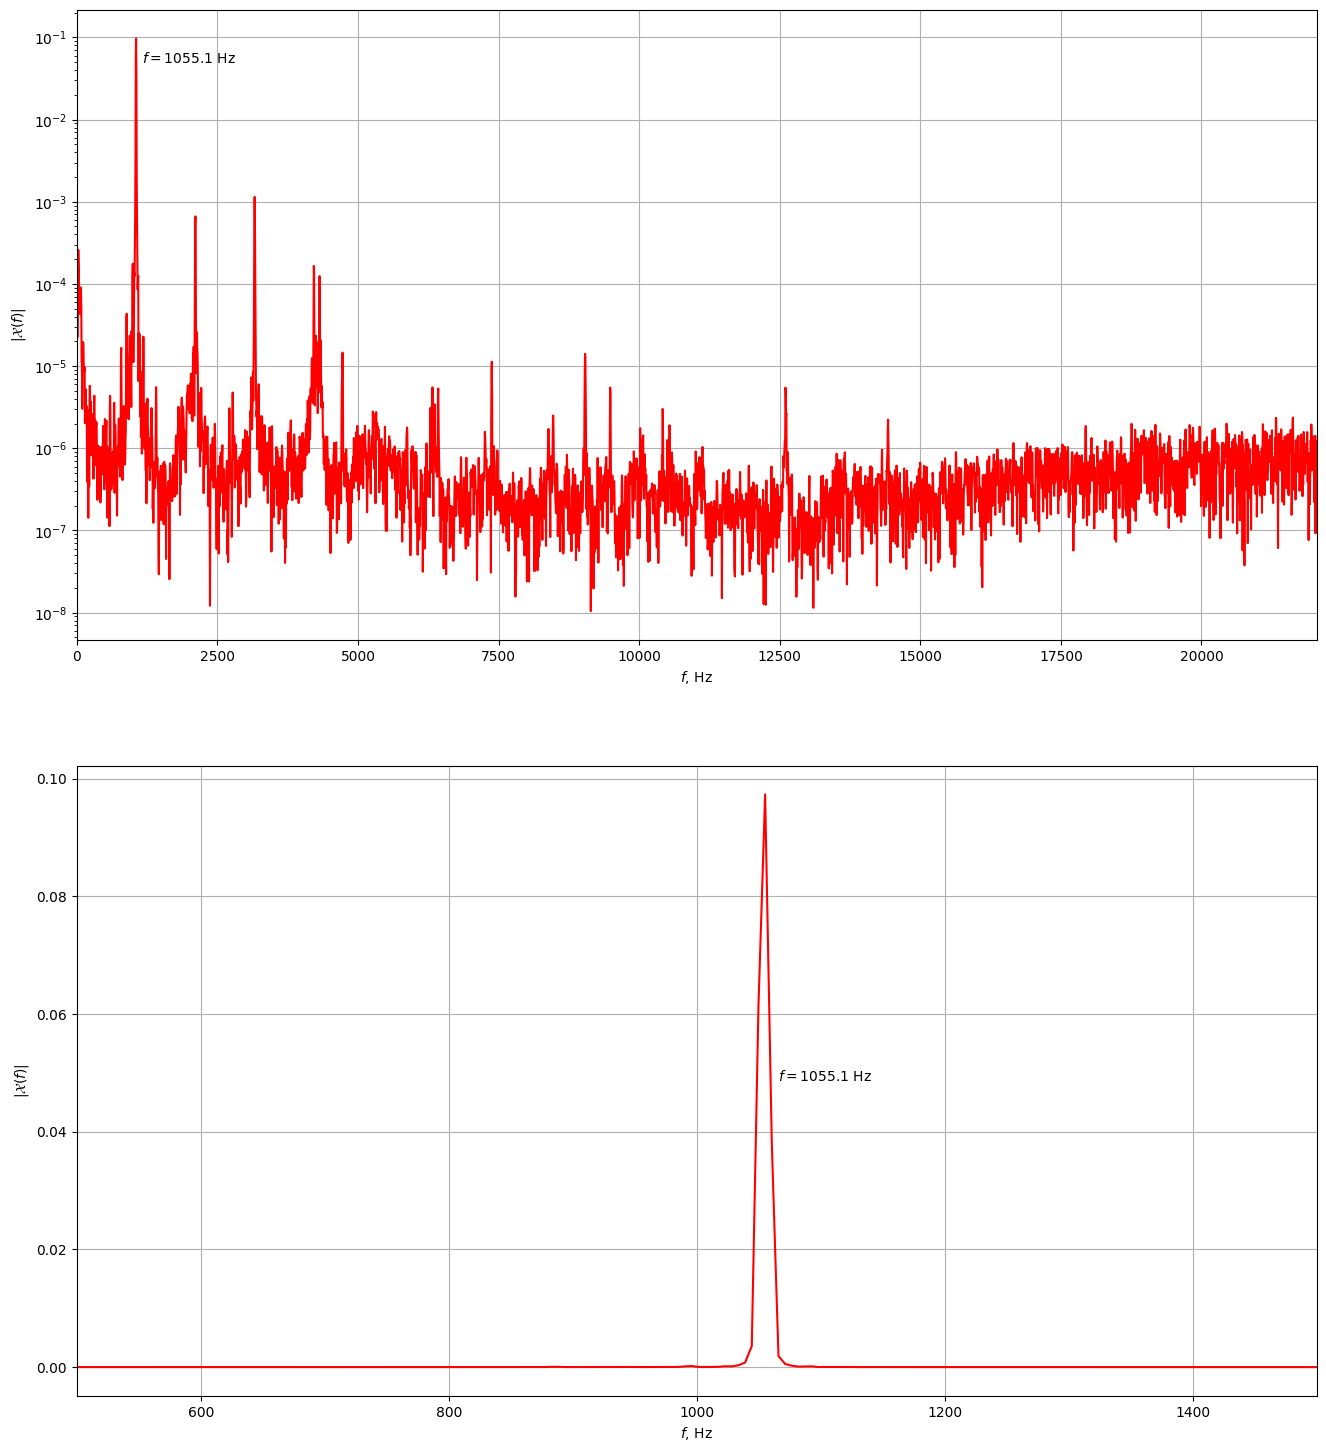

In [67]:
x = x*signal.hann(M)
data = list(abs(np.fft.fftshift(np.fft.fft(x, M)))/M)
index = data.index(max(data))
freq = abs((1/2 - index/M)*fs)

fig, ax = plt.subplots(figsize=(16, 18)) 
plt.subplot(211)
plt.plot((-0.5+(np.arange(M)/M))*fs, data, 'red')
plt.annotate('$f = {:.1f}$ Hz'.format(freq), (freq+100, max(data)/2))
plt.axis(xmin=0, xmax=fs/2)
plt.xlabel('$f$, Hz')
plt.yscale('log')

plt.ylabel('$|\mathcal{X}(f)|$')
plt.grid()

plt.subplot(212)
plt.plot((-0.5+(np.arange(M)/M))*fs, data, 'red')
plt.annotate('$f = {:.1f}$ Hz'.format(freq), (freq+10, max(data)/2))
plt.axis(xmin=500, xmax=1500)
plt.xlabel('$f$, Hz')
plt.ylabel('$|\mathcal{X}(f)|$')
plt.grid()


freq